In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [42]:
df = pd.read_csv('motor_second.csv')

In [43]:
df.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        199 non-null    object 
 1   tahun        199 non-null    int64  
 2   harga        199 non-null    int64  
 3   transmisi    199 non-null    object 
 4   odometer     199 non-null    int64  
 5   jenis        199 non-null    object 
 6   pajak        199 non-null    float64
 7   konsumsiBBM  199 non-null    float64
 8   mesin        198 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.1+ KB


<Axes: >

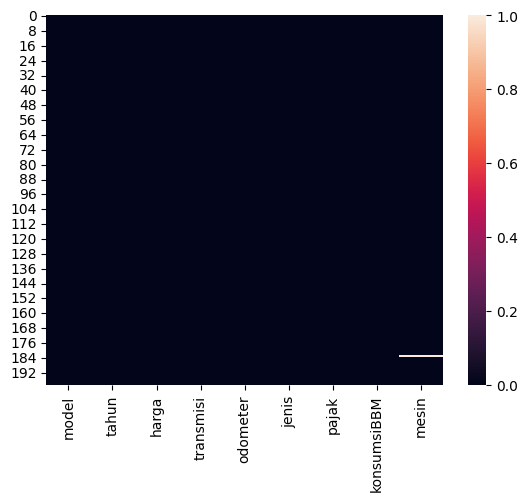

In [45]:
sns.heatmap(df.isnull())

In [46]:
df.describe() 

,tahun,harga,odometer,pajak,konsumsiBBM,mesin
count,199.000000,199.000000,199.000000,199.000000,199.000000,198.000000
mean,2016.618090,11385.015075,23468.306533,110.395477,53.905528,123.914141
std,1.712955,4534.671984,15689.247247,63.600019,11.819869,16.821177
min,2011.000000,3799.000000,1391.000000,0.000000,28.000000,0.000000
25%,2016.000000,7996.500000,12696.000000,30.000000,44.800000,110.000000
50%,2017.000000,10998.000000,21119.000000,145.000000,56.500000,125.000000
75%,2018.000000,14498.500000,32103.000000,145.000000,60.100000,125.000000
max,2019.000000,34998.000000,119050.000000,300.000000,125.000000,150.000000


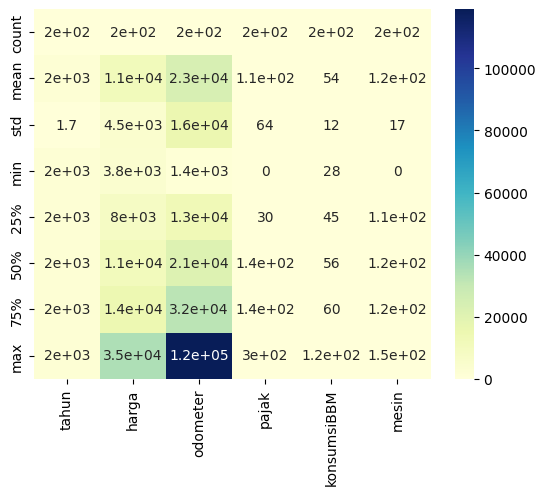

In [47]:
sns.heatmap(df.describe(), annot=True, cmap='YlGnBu')
plt.show()

In [48]:
models = df.groupby('model').count()[['pajak']].sort_values(by='pajak',ascending=True).reset_index()
models = models.rename(columns={'pajak':'odometer'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ' BeAT'),
  Text(1, 0, ' BeAT '),
  Text(2, 0, ' CB150R'),
  Text(3, 0, ' Supra GTR'),
  Text(4, 0, ' CRF 150'),
  Text(5, 0, ' Sonic 150'),
  Text(6, 0, ' BeAT Street'),
  Text(7, 0, ' Verza'),
  Text(8, 0, ' PCX'),
  Text(9, 0, ' Genio'),
  Text(10, 0, ' Supra X 125'),
  Text(11, 0, ' Revo'),
  Text(12, 0, ' Vario 125')])

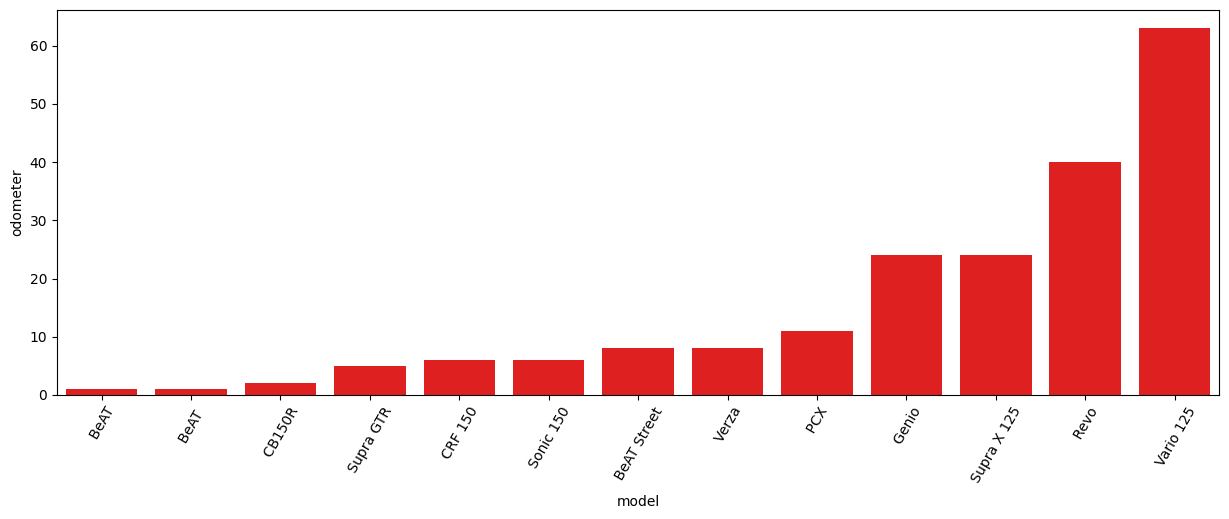

In [49]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['odometer'], color='red')
plt.xticks(rotation=60)

In [50]:
mesin = df.groupby('mesin').count()[['pajak']].sort_values(by='pajak').reset_index()
mesin = mesin.rename(columns={'pajak':'count'})


<Axes: xlabel='mesin', ylabel='count'>

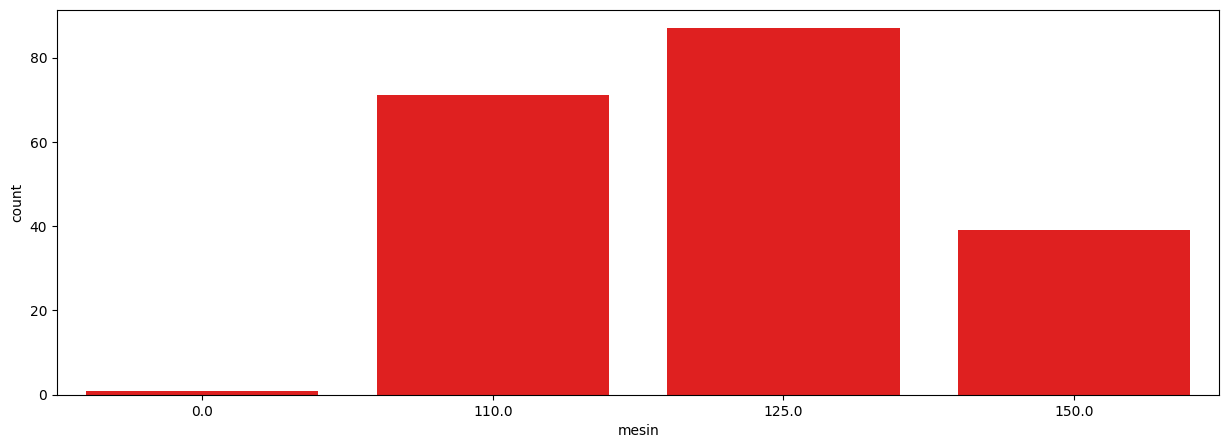

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x=mesin['mesin'], y=mesin['count'], color='red')

C:\Users\DYMAS PUTRA PRATAMA\AppData\Local\Temp\ipykernel_19376\3880394756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer'])


<Axes: xlabel='odometer', ylabel='Density'>

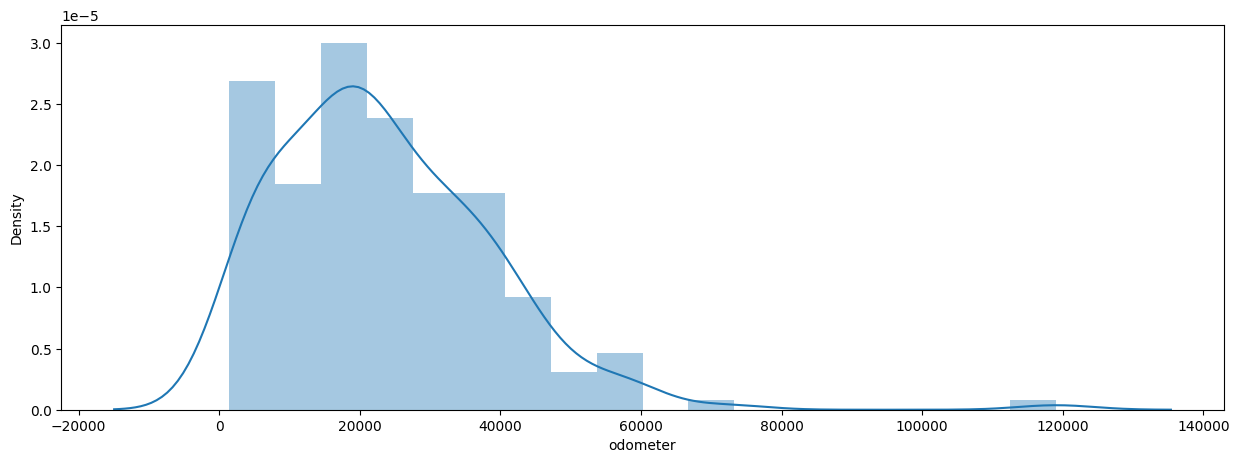

In [52]:
plt.figure(figsize=(15,5))
sns.distplot(df['odometer'])

C:\Users\DYMAS PUTRA PRATAMA\AppData\Local\Temp\ipykernel_19376\29149262.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['harga'])


<Axes: xlabel='harga', ylabel='Density'>

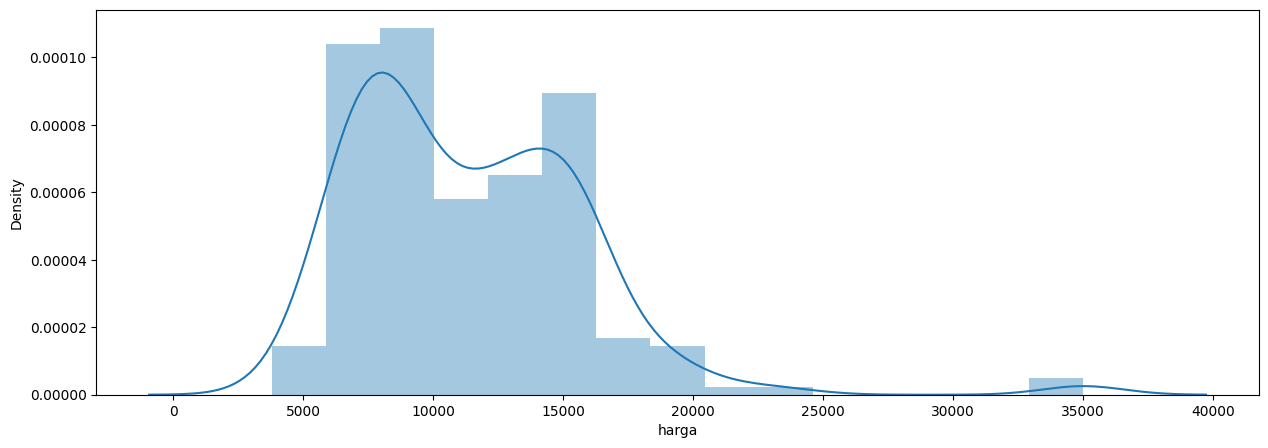

In [53]:
plt.figure(figsize=(15,5))
sns.distplot(df['harga'])

In [87]:
features = ['tahun','odometer','pajak','konsumsiBBM']
x = df[features]
y = df['harga']
x.shape, y.shape

((199, 4), (199,))

In [88]:
print(x.isna().sum())

print(y.isna().sum())


tahun          0
odometer       0
pajak          0
konsumsiBBM    0
dtype: int64
0


In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=70)
y_test.shape

(50,)

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [91]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = -0.007227466171241703


In [92]:
input_data = np.array([[2017,17307,145.0,58.9]])
prediction = lr.predict(input_data)
print('estimasi harga mobil dalam : IDR', prediction)

estimasi harga mobil dalam : IDR [12779.78875315]


c:\Users\DYMAS PUTRA PRATAMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
import pickle
filename = 'estimasi_motor.sav'
pickle.dump(lr,open(filename,'wb'))